# Task: Third Parties Or Employees + Gender mostly involved in accidents

Each week I challenge myself to find and solve a task on kaggle to build a better Data Science portfolio. For this week's challenge I chose to knock out two simple tasks with one notebook. The goal of this notebook is to explore the total volume and likelihood of incidents by the two featured groups.

Thanks to:
* IHM Stefanini for the data set https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database
* Tinotenda Mhlanga for the task https://www.kaggle.com/tinotendamhlanga

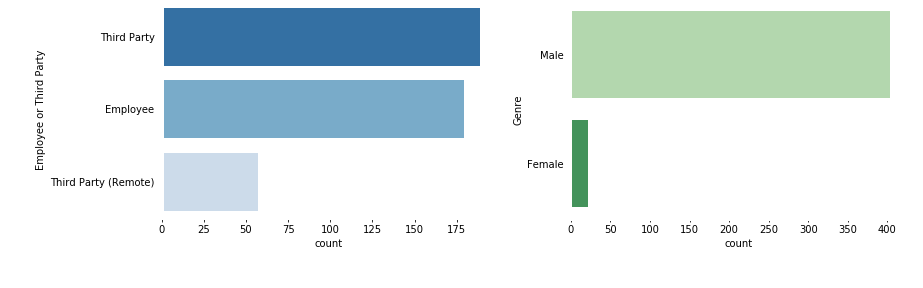

See below for how the graphs were generated and for further details.

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/industrial-safety-and-health-analytics-database/IHMStefanini_industrial_safety_and_health_database.csv
/kaggle/input/industrial-safety-and-health-analytics-database/Accidents_Storyline_example.png
/kaggle/input/industrial-safety-and-health-analytics-database/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv


In [2]:
data = pd.read_csv('/kaggle/input/industrial-safety-and-health-analytics-database/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.shape

(425, 10)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee or Third Party, dtype: int64

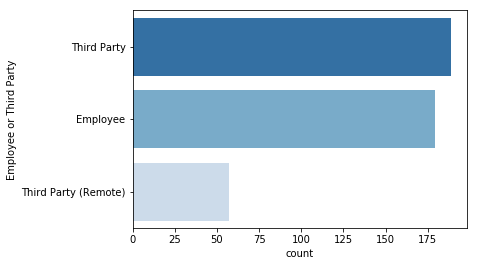

In [4]:
sns.countplot(y='Employee or Third Party', data=data, orient='h', palette='Blues_r')
acc_level = data['Employee or Third Party'].value_counts()
acc_level

Male      403
Female     22
Name: Genre, dtype: int64

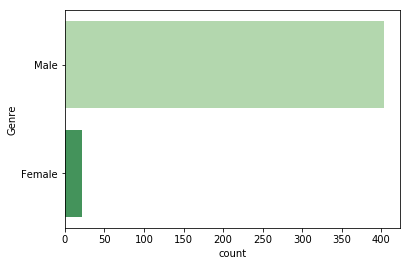

In [5]:
# there are some typos in the data, the columns Genre is actually meant to be Gender.
sns.countplot(y='Genre', data=data, orient='h', palette='Greens')
acc_level = data['Genre'].value_counts()
acc_level

There are two takeaways from the graphs above. First that Third party contractors have accidents at a slightly more frequent rate. And the second graph suggests that men are about 18 times more likely than women to have a workplace accident. Obviously there are some flaws with these conclusions. The workforce might not have a 50/50 split for gender or employment category, while we don't have the necessary data in this dataset to explore this possibility it is worth mentioning. There is also the possibility of workers failing to report incidents (which there is evidence to suggest is occurring at certain facilities, see the 'local_11' part of my other notebook for examples/details https://www.kaggle.com/schorsi/industrial-safety-totw ).

To test whether or not a group is accurately reporting accidents and injuries, let's look at the accident level column. Each accident is given a rating of 1 to 6 based on severity, where a level 1 is not serious, consisting of bruises, cuts, or trivial damage, and 4 and above are serious enough to include permanent injury or fatality (examples of these are included in my other notebook as well). Level 1 incidents are typically low enough in severity that a worker could hide them if they didn't want to report an accident. To test this, let's see if the ratio of level 1 to higher accident levels are consistent across each group.

To go from the two graphs above to the final image which I displayed at the beginning, I used ms paint to line up the two graphs and remove any components of the graph that failed to convey information.

In [6]:

level_map = {'I': 1, 'II': 2,'III': 3 , 'IV' : 4, 'V': 5, 'VI' : 6}
data['Accident Level'] = pd.Series([level_map[x] for x in data['Accident Level']], index=data.index)

Ratio of level 1 incedents to level 2+ incedents:  2.899 


1    316
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64


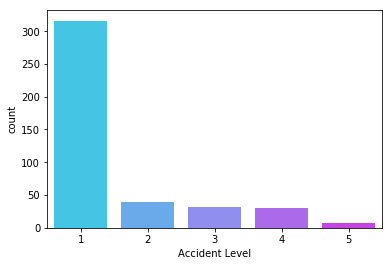

In [7]:
sns.countplot(x='Accident Level', data=data, palette='cool')
acc_level = data['Accident Level'].value_counts()
print("Ratio of level 1 incedents to level 2+ incedents: ",round(acc_level[1]/(acc_level.sum()-acc_level[1]), 3),'\n\n')
print(acc_level)

Ratio of level 1 incedents to level 2+ incedents, Third Party:  2.436 


1    134
2     19
4     16
3     14
5      6
Name: Accident Level, dtype: int64



Ratio of level 1 incedents to level 2+ incedents, Third Party (Remote):  2.8 


1    42
2     6
4     4
3     3
5     2
Name: Accident Level, dtype: int64


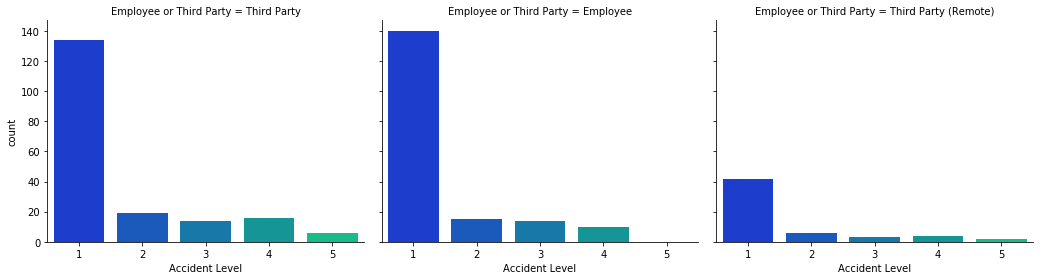

In [8]:
acc_level = data.loc[data['Employee or Third Party'] == 'Third Party']['Accident Level'].value_counts()
print("Ratio of level 1 incedents to level 2+ incedents, Third Party: ",round(acc_level[1]/(acc_level.sum()-acc_level[1]), 3),'\n\n')
print(acc_level)

acc_level = data.loc[data['Employee or Third Party'] == 'Third Party (Remote)']['Accident Level'].value_counts()
print("\n\n\nRatio of level 1 incedents to level 2+ incedents, Third Party (Remote): ",round(acc_level[1]/(acc_level.sum()-acc_level[1]), 3),'\n\n')
print(acc_level)

sns.catplot(x="Accident Level",col="Employee or Third Party",

                data=data, kind="count",

                height=4, aspect=1.2, palette='winter')

In [9]:
246/179

1.3743016759776536

# Conclusion Third Parties Or Employees:

Looking above the ratios of level 1 incidents to level 2+ incidents for employees and contractors is similar enough that I'd feel comfortable saying they are following similar reporting patterns. There are a total of 246 Third Party accident records and 179 Employee accident records. While I can safely say that Third Party workers have more accidents, without looking at hours worked by each subset, I can't say that they are more likely to have an accident. 

Ratio of level 1 incedents to level 2+ incedents:  4.5 


1    18
2     3
3     1
Name: Accident Level, dtype: int64


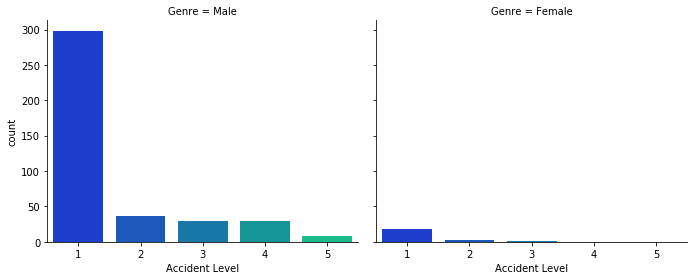

In [10]:
acc_level = data.loc[data['Genre'] == 'Female']['Accident Level'].value_counts()
print("Ratio of level 1 incedents to level 2+ incedents: ",round(acc_level[1]/(acc_level.sum()-acc_level[1]), 3),'\n\n')
print(acc_level)


sns.catplot(x="Accident Level", col="Genre",

                data=data, kind="count",

                height=4, aspect=1.2, palette='winter')

## Conclusion Gender mostly involved in accidents:

Of the 425 recorded accidents, 403 of them were caused by men. So it is pretty easy to say that men cause more accidents. Similar to the conclusion for Employee vs Third Party, without seeing a breakdown of total hours worked by gender I can't say which group is the higher risk.

One other point worth noting is the Ratio of level 1 incidents to level 2+ incidents for women, the severity of the accidents they are involved in are lower than that of their male peers. Because of how small the sample size is for this group, I'm not sure if it is wise to assume that this ratio is significant. For instance, fewer than 1 in 10 incidents are higher than level 4, so it could simply be an artifact of a small sample size that the ratio is skewed towards lower level incidents. 

# Final Thoughts:

While the tasks are simple, I get the feeling there is something I missed here. Possibly a feature that needed further exploration to get a more complete answer to the challenge. Feel free to leave any constructive feedback, or ideas for further exploration in the comments section.

This year I've challenged myself to complete one task on Kaggle per week, in order to develop a larger Data Science portfolio. I chose to explore a pair of simple tasks this week because of competition deadlines and a camping trip that I've been looking forward to. If you found this notebook useful or interesting please give it an upvote. If you would like to collaborate on a future task of the week feel free to leave a comment here or message me directly. For past TOTW check out the link to my page on github for this ongoing project
https://github.com/Neil-Kloper/Weekly-Kaggle-Task/wiki 